In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_wandb_csv(csvpath, name, metric='test_reward', ylabel='test reward (normalized)'):
    
    def rename(x):
        if x.endswith(f'{metric}_A'):
            return f'{metric}_A'
        elif x.endswith(f'{metric}_B'):
            return f'{metric}_B'
        else:
            return x
        
    df = pd.read_csv(csvpath)
    dfs = []
    for i in range(5):
        dfs.append(df[[f'{name}-seed{i} - {metric}_A',f'{name}-seed{i} - {metric}_B','episode']].rename(rename,axis=1))
    concatdf = pd.concat(dfs, ignore_index=True)
    
    sns.lineplot(data=concatdf, x='episode', y=f'{metric}_A', label='agent A')
    sns.lineplot(data=concatdf, x='episode', y=f'{metric}_B', label='agent B')
    plt.ylabel(ylabel)
    plt.legend()

In [ ]:
# NONE
with sns.plotting_context('paper'):
    sns.set(font_scale=1.2)
    csvpath = './logs/self-none-reward.csv'
    plot_wandb_csv(csvpath, 'self-none')
    plt.savefig(csvpath.replace('csv','png'), bbox_inches='tight')
    plt.show()


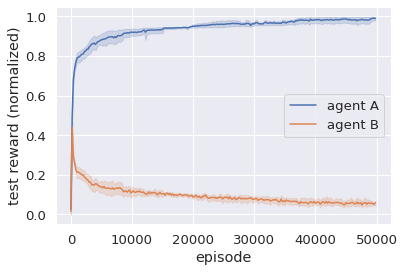

In [124]:
# LING
with sns.plotting_context('paper'):
    sns.set(font_scale=1.2)
    csvpath = './logs/self-ling-reward.csv'
    plot_wandb_csv(csvpath, 'self-ling')
    plt.savefig(csvpath.replace('csv','png'), bbox_inches='tight')
    plt.show()

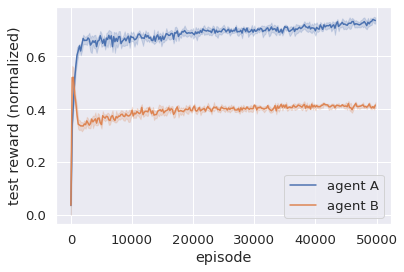

In [123]:
# PROP
with sns.plotting_context('paper'):
    sns.set(font_scale=1.2)
    csvpath = './logs/self-prop-reward.csv'
    plot_wandb_csv(csvpath, 'self-prop')
    plt.savefig(csvpath.replace('csv','png'), bbox_inches='tight')
    plt.show()


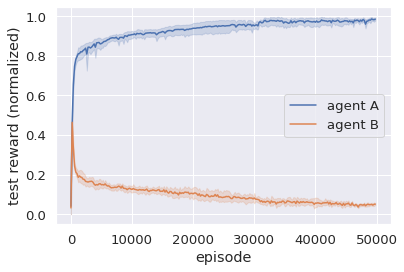

In [120]:
# LING MASKING
with sns.plotting_context('paper'):
    sns.set(font_scale=1.2)
    csvpath = './logs/self-ling-masking-reward.csv'
    plot_wandb_csv(csvpath, 'self-ling-masking')
    plt.savefig(csvpath.replace('csv','png'), bbox_inches='tight')
    plt.show()


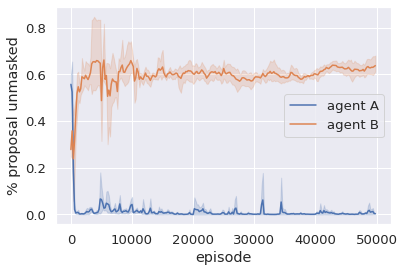

In [6]:
# LING MASK
with sns.plotting_context('paper'):
    sns.set(font_scale=1.2)
    csvpath = '../logs/self-ling-masking-mask.csv'
    plot_wandb_csv(csvpath, 'self-ling-masking', metric='prop_unmasked', ylabel='% proposal unmasked')
    plt.legend(loc='center right')
    plt.savefig(csvpath.replace('csv','png'), bbox_inches='tight')
    plt.show()
